# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
!ls

horse_data.csv	horse_data.names  stat_basics.ipynb


In [201]:
horses = pd.read_csv('horse_data.csv', header=None)
horses.head(1)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2


In [202]:
horses.replace('?', np.nan, inplace=True)

In [203]:
horses.dtypes

0     object
1      int64
2      int64
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23     int64
24     int64
25     int64
26     int64
27     int64
dtype: object

In [225]:
df = horses.copy()
df = df.fillna(df.mode(), inplace=True)
y = df[0]
X = df.drop([0], axis='columns')

reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

TypeError: 'NoneType' object is not subscriptable

In [228]:
df

In [204]:
def predict_nan(numcol: int, df: pd.DataFrame=horses):
    
    y = df[col]
    X = df.drop([col], axis='columns', inplace=True)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))
for col in horses.columns:
    if horses[col].nunique() <= 12:
        horses[col] = horses[col].astype('category')
        horses[col].fillna(horses[col].mode(), inplace=True)
    if horses[col].dtype == 'object':
        horses[col] = pd.to_numeric(horses[col], errors='coerce', )
    if horses[col].dtype == 'category':
        horses[col].fillna(horses[col].mode(), inplace=True)
horses.head(10)

IndentationError: expected an indented block (<ipython-input-204-5db60d5ef3b7>, line 3)

In [199]:
horses.dtypes

0     category
1     category
2        int64
3      float64
4      float64
5      float64
6     category
7     category
8     category
9     category
10    category
11    category
12    category
13    category
14    category
15     float64
16    category
17    category
18     float64
19     float64
20    category
21     float64
22    category
23    category
24       int64
25    category
26    category
27    category
dtype: object

In [180]:
horses.isna().sum()

0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
23      0
24      0
25      0
26      0
27      0
dtype: int64

In [187]:
horses[0].fillna(horses[0].mode(), inplace=True)
horses.head(10)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.5,66.0,28.0,3,3,NaN,2,...,45.0,8.4,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88.0,20.0,NaN,NaN,4,1,...,50.0,85.0,2,2.0,3,2,2208,0,0,2
2,2,1,530334,38.3,40.0,24.0,1,1,3,1,...,33.0,6.7,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.1,164.0,84.0,4,1,6,2,...,48.0,7.2,3,5.3,2,1,2208,0,0,1
4,2,1,530255,37.3,104.0,35.0,NaN,NaN,6,2,...,74.0,7.4,NaN,NaN,2,2,4300,0,0,2
5,2,1,528355,NaN,NaN,NaN,2,1,3,1,...,NaN,NaN,NaN,NaN,1,2,0,0,0,2
6,1,1,526802,37.9,48.0,16.0,1,1,1,1,...,37.0,7.0,NaN,NaN,1,1,3124,0,0,2
7,1,1,529607,NaN,60.0,NaN,3,NaN,NaN,1,...,44.0,8.3,NaN,NaN,2,1,2208,0,0,2
8,2,1,530051,NaN,80.0,36.0,3,4,3,1,...,38.0,6.2,NaN,NaN,3,1,3205,0,0,2
9,2,9,5299629,38.3,90.0,NaN,1,NaN,1,1,...,40.0,6.2,1,2.2,1,2,0,0,0,1


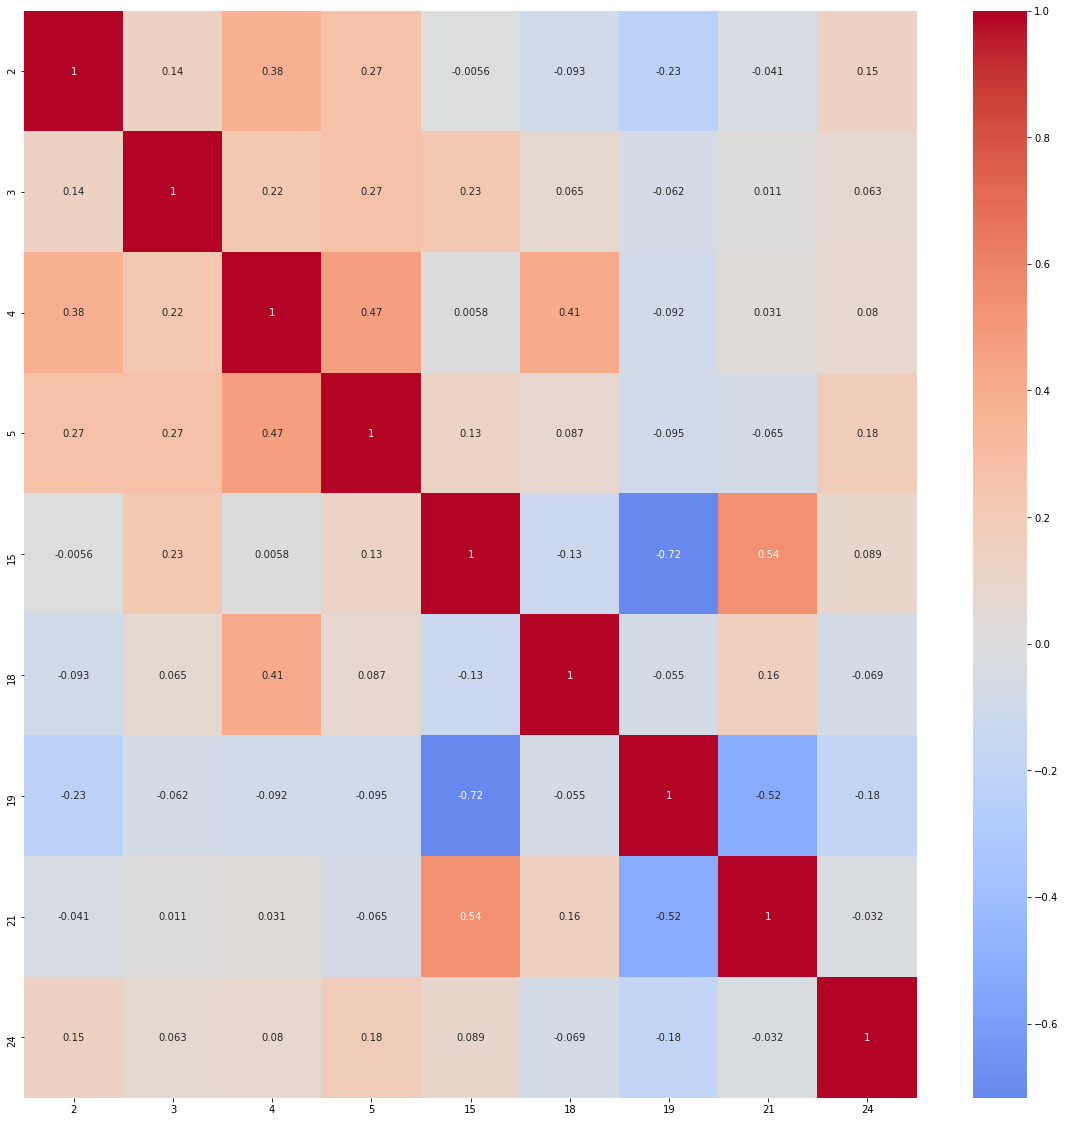

In [156]:
plt.subplots(figsize=(20, 20))
sns.heatmap(horses.corr(), annot = True, center= 0, cmap= 'coolwarm');

In [146]:
horses[horses[0].isna()]

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
132,NaN,1,534572,38.0,48.0,20.0,3,1,3,1,...,43.0,73.0,2,1.0,NaN,1,3111,0,0,2


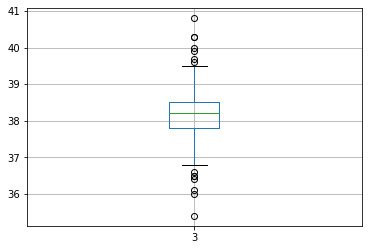

In [172]:
horses.boxplot(3);

In [158]:
horses.describe()

,2,3,4,5,15,18,19,21,24
count,3.000000e+02,240.000000,276.000000,242.000000,53.000000,271.000000,267.000000,102.000000,300.000000
mean,1.085889e+06,38.167917,71.913043,30.417355,4.707547,46.295203,24.456929,3.019608,3657.880000
std,1.529801e+06,0.732289,28.630557,17.642231,1.982311,10.419335,27.475009,1.968567,5399.513513
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.500000,3.000000,38.000000,6.500000,2.000000,2111.750000
50%,5.303055e+05,38.200000,64.000000,24.500000,5.000000,45.000000,7.500000,2.250000,2673.500000
75%,5.347275e+05,38.500000,88.000000,36.000000,6.500000,52.000000,57.000000,3.900000,3209.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000


0      3.0
1      NaN
2      1.0
3      4.0
4      NaN
      ... 
295    4.0
296    3.0
297    4.0
298    3.0
299    NaN
Name: 6, Length: 300, dtype: float64

In [9]:
horses.describe()

,1,2,23,24,25,26,27
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.640000,1.085889e+06,1.363333,3657.880000,90.226667,7.363333,1.670000
std,2.173972,1.529801e+06,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,5.184760e+05,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.289040e+05,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,5.303055e+05,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,1.000000,5.347275e+05,2.000000,3209.000000,0.000000,0.000000,2.000000
max,9.000000,5.305629e+06,2.000000,41110.000000,7111.000000,2209.000000,2.000000


## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.